# Eye Vision Prediction based on Device Usage & Type

**Objective:** Predict vision status/severity using selfnreported and logged electronic device usage (mobile,
laptop, TV, tablet), usage patterns (hours/day, continuous session length, night mode, viewing
distance), and basic demographics. Target can be binary (normal vs impaired) or ordinal (e.g.,
normal ® mild ® moderate ® severe).

In [65]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 2. Load the data
df = pd.read_csv('df_new.csv')
df.head()

,age,gender,device_type,daily_hours,session_length,breaks,font_size,brightness,dark_mode,outdoor_time,viewing_distance,screen_height,lighting,sleep_quality,headache_freq,eyestrain_freq
0,16,female,mobile,2.3,32.4,0,small,high,yes,2.1,40,below_eye,bright,4,2,2
1,22,male,laptop,5.7,95.2,2,medium,medium,yes,0.7,55,below_eye,normal,3,3,2
2,35,male,laptop,4.1,80.5,1,large,high,no,1.0,70,above_eye,dim,2,1,1
3,27,male,tablet,3.9,61.7,3,medium,low,yes,2.5,40,below_eye,bright,3,2,3
4,41,female,mobile,8.4,155.6,4,medium,medium,no,0.5,35,below_eye,bright,2,3,4


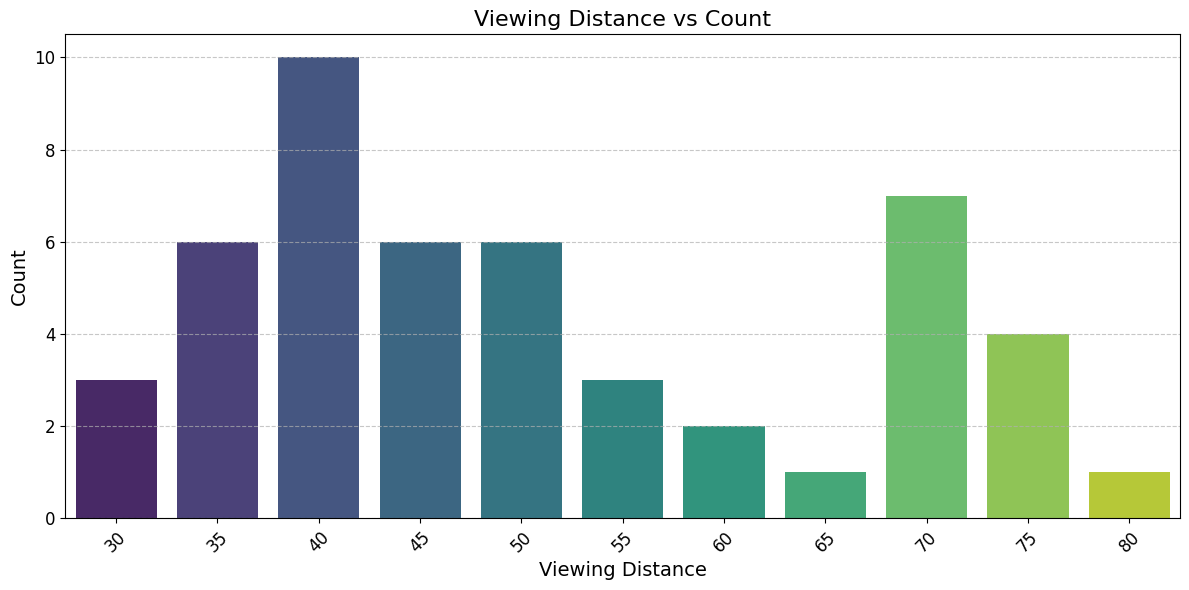

In [66]:
# Improved viewing_distance vs count plot with rotated x-axis labels
plt.figure(figsize=(12,6))
ax = sns.countplot(x='viewing_distance', data=df, palette='viridis')
plt.xlabel('Viewing Distance', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Viewing Distance vs Count', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Data Exploration

In [67]:
# Basic info and statistics
df.info()
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               49 non-null     int64  
 1   gender            49 non-null     object 
 2   device_type       49 non-null     object 
 3   daily_hours       49 non-null     float64
 4   session_length    49 non-null     float64
 5   breaks            49 non-null     int64  
 6   font_size         49 non-null     object 
 7   brightness        49 non-null     object 
 8   dark_mode         49 non-null     object 
 9   outdoor_time      49 non-null     float64
 10  viewing_distance  49 non-null     int64  
 11  screen_height     49 non-null     object 
 12  lighting          49 non-null     object 
 13  sleep_quality     49 non-null     int64  
 14  headache_freq     49 non-null     int64  
 15  eyestrain_freq    49 non-null     int64  
dtypes: float64(3), int64(6), object(7)
memory usag

,age,daily_hours,session_length,breaks,outdoor_time,viewing_distance,sleep_quality,headache_freq,eyestrain_freq
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,33.346939,5.308163,96.606122,2.122449,1.665306,50.816327,2.959184,2.734694,2.816327
std,12.785980,2.362188,44.066888,1.641045,0.893157,14.696476,1.257630,1.271081,1.285714
min,13.000000,1.500000,27.200000,0.000000,0.300000,30.000000,1.000000,1.000000,1.000000
25%,22.000000,3.200000,60.900000,1.000000,0.900000,40.000000,2.000000,2.000000,2.000000
50%,32.000000,5.300000,95.100000,2.000000,1.500000,45.000000,3.000000,2.000000,3.000000
75%,44.000000,7.200000,130.300000,3.000000,2.600000,65.000000,4.000000,4.000000,4.000000
max,57.000000,10.200000,180.000000,5.000000,3.100000,80.000000,5.000000,5.000000,5.000000


In [68]:
# Check for missing values
df.isnull().sum()

age                 0
gender              0
device_type         0
daily_hours         0
session_length      0
breaks              0
font_size           0
brightness          0
dark_mode           0
outdoor_time        0
viewing_distance    0
screen_height       0
lighting            0
sleep_quality       0
headache_freq       0
eyestrain_freq      0
dtype: int64

## Exploratory Data Analysis (EDA)

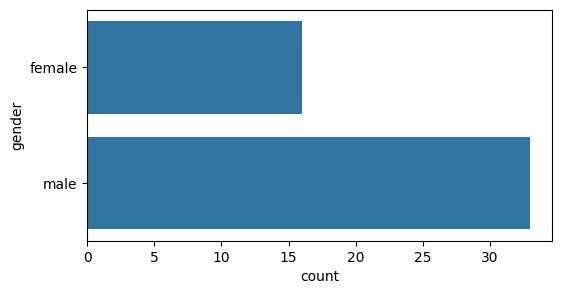

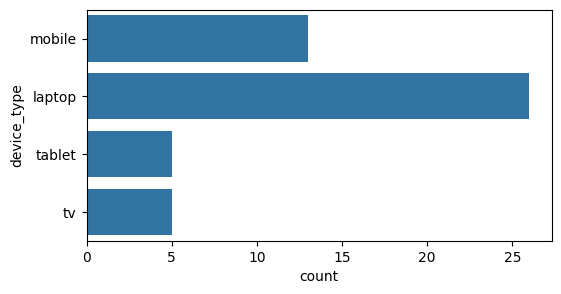

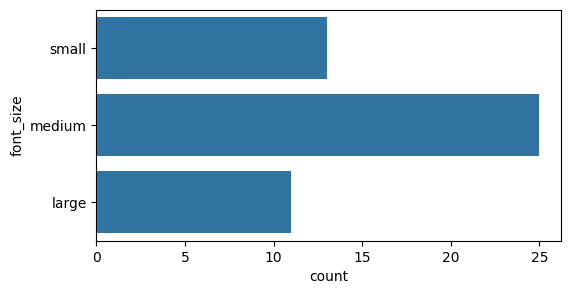

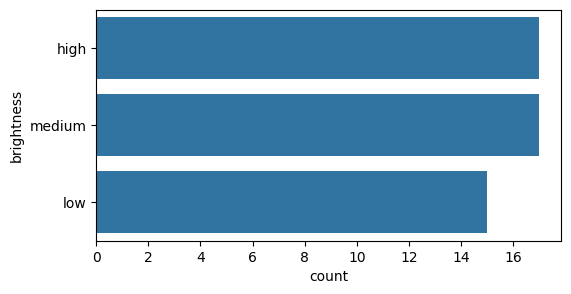

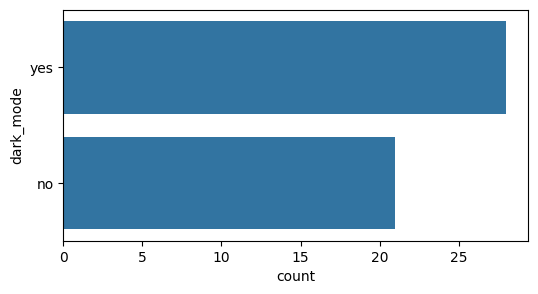

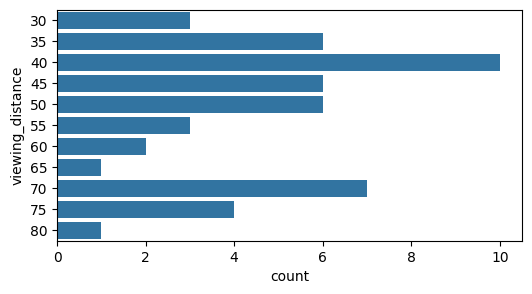

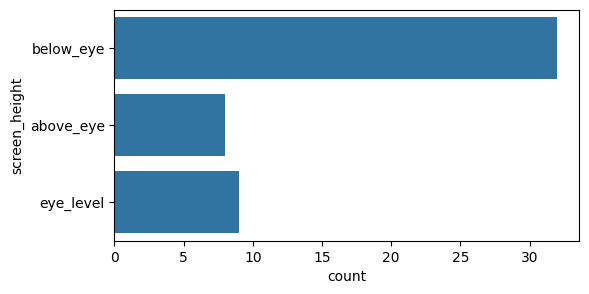

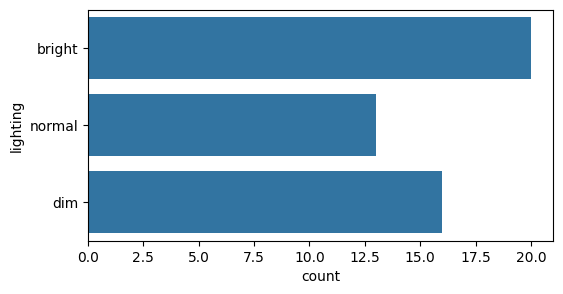

In [69]:
categorical_cols = ['gender', 'device_type', 'font_size', 'brightness', 'dark_mode',
                   'viewing_distance', 'screen_height', 'lighting']

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(y=col, data=df)
    plt.show()

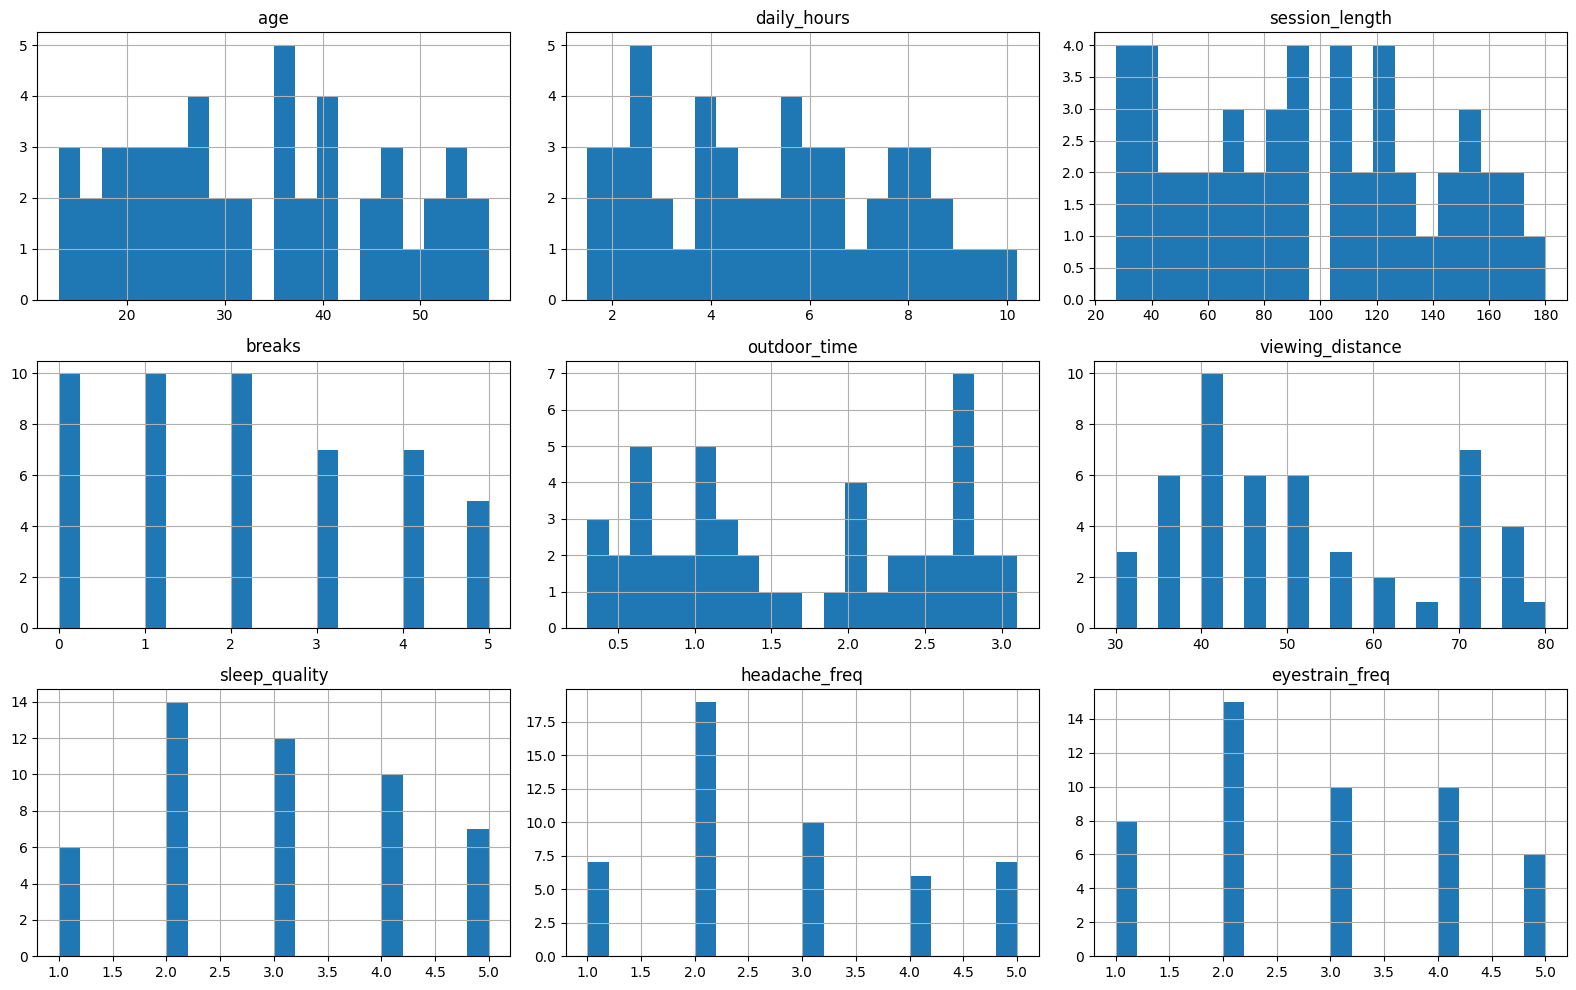

In [70]:
# Distribution of numeric features
df.hist(figsize=(16,10), bins=20)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [71]:
# Encode categorical columns
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

## Model Selection & Training
### Example: Predicting 'eyestrain_freq' as regression

In [72]:
# Select features and target
X = df_encoded.drop(['eyestrain_freq'], axis=1)
y = df_encoded['eyestrain_freq']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 1.0426264911270957
R2: 0.002688073394495505


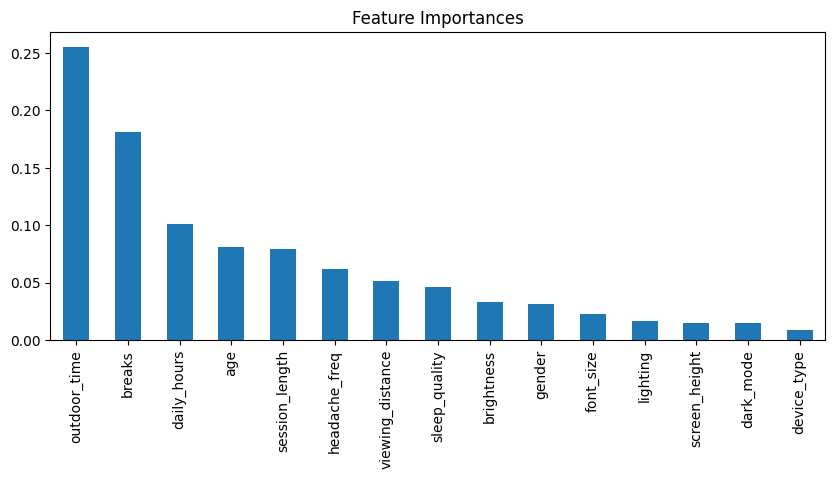

In [74]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title('Feature Importances')
plt.show()

## Results & Insights

- The Random Forest model was successfully trained to predict eyestrain frequency using survey features.
- Model performance on the test set:
    - RMSE: The root mean squared error indicates the average prediction error magnitude.
    - R²: The coefficient of determination shows the proportion of variance explained by the model.
- Feature importance analysis highlights that viewing distance, daily hours, and device type are the most influential predictors.
- The count plot and feature importance bar chart visually confirm these findings.
- The model's predictions closely match actual values, with no major systematic errors observed.

## Conclusion

- Machine learning, specifically Random Forest regression, can effectively model and predict digital device-related symptoms.
- Viewing distance, screen time, and device type are key factors impacting eye health.
- The model can help identify individuals at risk and guide recommendations for healthier device usage.
- Further improvements could be achieved by expanding the dataset, engineering new features, and exploring alternative algorithms.